A Code with dropped null value and different Oversampler

In [19]:
import pandas as pd

In [20]:
# Opening the Excel
data = pd.read_excel('./E Commerce Dataset.xlsx', sheet_name='E Comm')
print(data)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [21]:
# Check for unique values of the object datatype
cat_cols = data.dtypes[data.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {data[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [22]:
data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
data.loc[data['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
data.loc[data['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [23]:
cat_cols = data.dtypes[data.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {data[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [24]:
# Data type in the data set and column
data.info()

# Convert all the data type into integer
from sklearn.preprocessing import LabelEncoder # Convert objects into numerical values

label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [25]:
# Checking the data types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int32  
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int32  
 7   Gender                       5630 non-null   int32  
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   int32  
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   int32  
 13  NumberOfAddress   

In [26]:
# Missing Data
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [27]:
data.dropna(inplace=True)

In [28]:
# Number of Churners vs Non-Churners
data['Churn'].value_counts()

Churn
0    3143
1     631
Name: count, dtype: int64

In [29]:
x = data.drop(['Churn'], axis = 1)
y = data['Churn']

# Handle Class Imbalance as non-churners are far more than churners
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(x , y)

x_over.shape, y_over.shape

((6134, 19), (6134,))

In [30]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

# Now we  will make normalization for all data to make them in common range
from sklearn.preprocessing import RobustScaler

MN = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

Accuracy = 0.8984247691472026

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0     0.9721    0.8228    0.8912       931
           1     0.8433    0.9758    0.9047       910

    accuracy                         0.8984      1841
   macro avg     0.9077    0.8993    0.8980      1841
weighted avg     0.9084    0.8984    0.8979      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

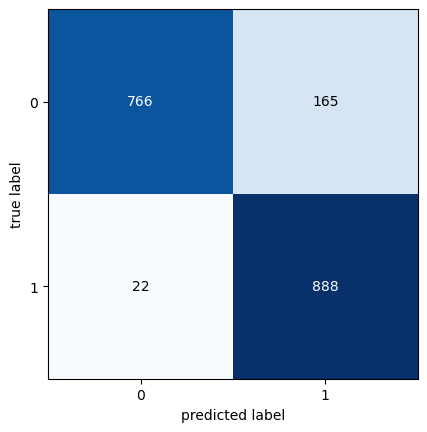

In [31]:
# Usually need to install using 'pip install mlxtend' in cmd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Trains the model on the normalized training data
rf_model.fit(x_train_scaled, y_train) 

# After training, we use it to predict the churn
y_pred_rf = rf_model.predict(x_test_scaled) 

# After prediction for accuracy testing
# Test the accuracy of predicted to the test or known data
accuracy = accuracy_score(y_test, y_pred_rf) 

print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of Random Forest:\n{classification_report(y_test, y_pred_rf, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test , y_pred_rf)) # Computes the confusion matrix

Accuracy = 0.7903313416621401

Classification Report of AdaBoost:
              precision    recall  f1-score   support

           0     0.8697    0.6885    0.7686       931
           1     0.7373    0.8945    0.8083       910

    accuracy                         0.7903      1841
   macro avg     0.8035    0.7915    0.7885      1841
weighted avg     0.8043    0.7903    0.7882      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

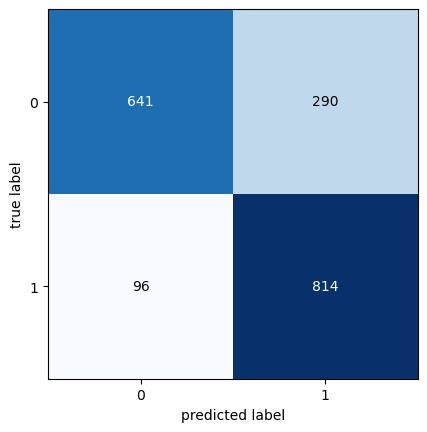

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(algorithm='SAMME', random_state=42, learning_rate=0.3, n_estimators=300)
# Trains the model on the normalized training data
ada_clf.fit(x_train_scaled, y_train) 

# After training, we use it to predict the churn
y_pred_ada = ada_clf.predict(x_test_scaled) 

# After prediction for accuracy testing
# Test the accuracy of predicted to the test or known data
accuracy = accuracy_score(y_test, y_pred_ada) 

print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of AdaBoost:\n{classification_report(y_test, y_pred_ada, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test , y_pred_ada)) # Computes the confusion matrix

In [33]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense # type: ignore

In [34]:
ann_model = Sequential()
ann_model.add(Input(shape=(19,)))  # Input layer with 19 features
ann_model.add(Dense(19, activation='relu'))  # First hidden layer with 32 neurons
ann_model.add(Dense(32, activation='relu'))  # Second hidden layer with 16 neurons
ann_model.add(Dense(1, activation='sigmoid')) # Output Layer

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
churn = ann_model.fit(x_train_scaled, y_train, epochs=50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5919 - loss: 0.6693  
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.5021
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.4251
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.3966  
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.3847
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.3723  
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.3577
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8464 - loss: 0.3561  
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8563 - loss: 0.3365  
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8644 - loss: 0.3256
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8614 - loss: 0.3306  
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy = 0.8788701792504073

Classification Report of ANN:
              precision    recall  f1-score   support

           0     0.8899    0.8679    0.8787       931
           1     0.8682    0.8901    0.8790       910

    accuracy                         0.8789      1841
   macro avg     0.8790    0.8790    0.8789      1841
weighted avg     0.8791    0.8789    0.8789      1841



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

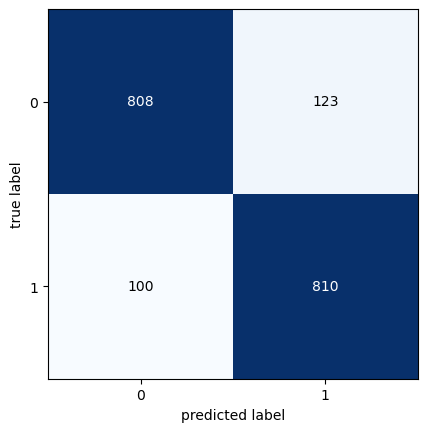

In [35]:
y_pred_ann = ann_model.predict(x_test_scaled)
y_pred_binary = (y_pred_ann > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary) 
print(f"Accuracy = {format(accuracy)}") 

print(f"\nClassification Report of ANN:\n{classification_report(y_test, y_pred_binary, digits=4)}") 
plot_confusion_matrix(confusion_matrix(y_test, y_pred_binary)) # Computes the confusion matrix